In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import torch
import transformers
import pickle
from tqdm import tqdm

In [6]:
with open('../data/metadata_filtered.pkl', 'rb') as f:
    data = pickle.load(f)

In [7]:
len(data)

274296

In [9]:
bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
bert_tokens = {}
for i, id in enumerate(tqdm(data)):
    obj = data[id]
    abstract = obj['abstract']
    bert_tokens[id] = bert_tokenizer.tokenize(abstract)

100%|██████████| 274296/274296 [18:00<00:00, 253.85it/s]


In [10]:
len(bert_tokens)

274296

In [30]:
metadata_bert_tokens = {}
for id in tqdm(data):
    metadata_bert_tokens[id] = bert_tokenizer.convert_tokens_to_ids(bert_tokens[id])

100%|██████████| 274296/274296 [00:38<00:00, 7166.99it/s]


In [33]:
# metadata_bert_tokens[list(metadata_bert_tokens.keys())[0]]

In [34]:
with open('../data/metadata_bert_tokens.pkl', 'wb') as f:
    pickle.dump(metadata_bert_tokens, f)

In [35]:
token_lengths = [
    len(metadata_bert_tokens[id]) for id in metadata_bert_tokens
]

(array([2.7400e+03, 1.4449e+04, 3.6920e+04, 5.9479e+04, 6.0785e+04,
        4.7519e+04, 2.7006e+04, 1.5402e+04, 5.9740e+03, 2.0060e+03,
        9.8000e+02, 5.1100e+02, 2.8100e+02, 1.3100e+02, 5.9000e+01,
        2.5000e+01, 1.5000e+01, 7.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([  2.  ,  47.55,  93.1 , 138.65, 184.2 , 229.75, 275.3 , 320.85,
        366.4 , 411.95, 457.5 , 503.05, 548.6 , 594.15, 639.7 , 685.25,
        730.8 , 776.35, 821.9 , 867.45, 913.  ]),
 <a list of 20 Patch objects>)

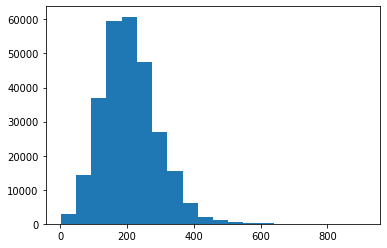

In [36]:
plt.hist(
    token_lengths,
    bins=20
)

In [37]:
max_len = max(token_lengths)
max_len

913

In [38]:
min_len = min(token_lengths)
min_len

2

In [39]:
mean_len = sum(token_lengths) / len(token_lengths)
mean_len

208.37784364336338